In [1]:
# Required libraries

import pandas as pd
import numpy as np
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
import re
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# Import data
df = pd.read_csv("dataset_parse_drop.csv", index_col = [0])

In [3]:
# Columns
df.columns

Index(['Title', 'Date', 'Station', 'Text', 'Tags'], dtype='object')

In [4]:
# No of articles
len(df)

6374

In [5]:
# Check for null values
df.isna().sum()

Title      0
Date       5
Station    1
Text       0
Tags       0
dtype: int64

In [6]:
# Deal with null values
df['Station'].fillna(df['Station'].mode(), inplace = True)
df['Date'].fillna("Unknown", inplace = True)

In [7]:
# Remove punctuations and stop words

df["Processed_Text"] = df["Text"].str.replace("[^\w\s]"," ")
df["Processed_Text"] = df["Processed_Text"].str.lower()
df["Processed_Text"] = df["Processed_Text"].str.replace(pat = "[\s]+", repl = " ", regex = True)
df["Processed_Text"] = df["Processed_Text"].apply(lambda row: word_tokenize(row))
stopwords = nltk.corpus.stopwords.words("english")
df["Processed_Text"] = df["Processed_Text"].apply(lambda x: [item for item in x if item not in stopwords])
df["Processed_Text"] = df["Processed_Text"].apply(lambda x: ' '.join([item for item in x]))

In [8]:
# Perform lemmatization

lemmatizer = WordNetLemmatizer()

def lemmatize_word(tagged_token):
    """ Returns lemmatized word given its tag"""
    root = []
    for token in tagged_token:
        tag = token[1][0]
        word = token[0]
        if tag.startswith('J'):
            root.append(lemmatizer.lemmatize(word, wordnet.ADJ))
        elif tag.startswith('V'):
            root.append(lemmatizer.lemmatize(word, wordnet.VERB))
        elif tag.startswith('N'):
            root.append(lemmatizer.lemmatize(word, wordnet.NOUN))
        elif tag.startswith('R'):
            root.append(lemmatizer.lemmatize(word, wordnet.ADV))
        else:          
            root.append(word)
    return root

def lemmatize_doc(document):
    """ Tags words then returns sentence with lemmatized words"""
    lemmatized_list = []
    tokenized_sentence = sent_tokenize(document)
    for sentence in tokenized_sentence:
        tokenized_word = word_tokenize(sentence)
        tagged_token = pos_tag(tokenized_word)
        lemmatized = lemmatize_word(tagged_token)
        lemmatized_list.extend(lemmatized)
    return " ".join(lemmatized_list)

df["Processed_Text"] = df["Processed_Text"].apply(lambda row: lemmatize_doc(row))

### Frequency Distribution of all words

In [9]:
all_words = ' '.join([word for word in df['Processed_Text']])

In [10]:
words = nltk.word_tokenize(all_words)
frequency_distribution = FreqDist(words)

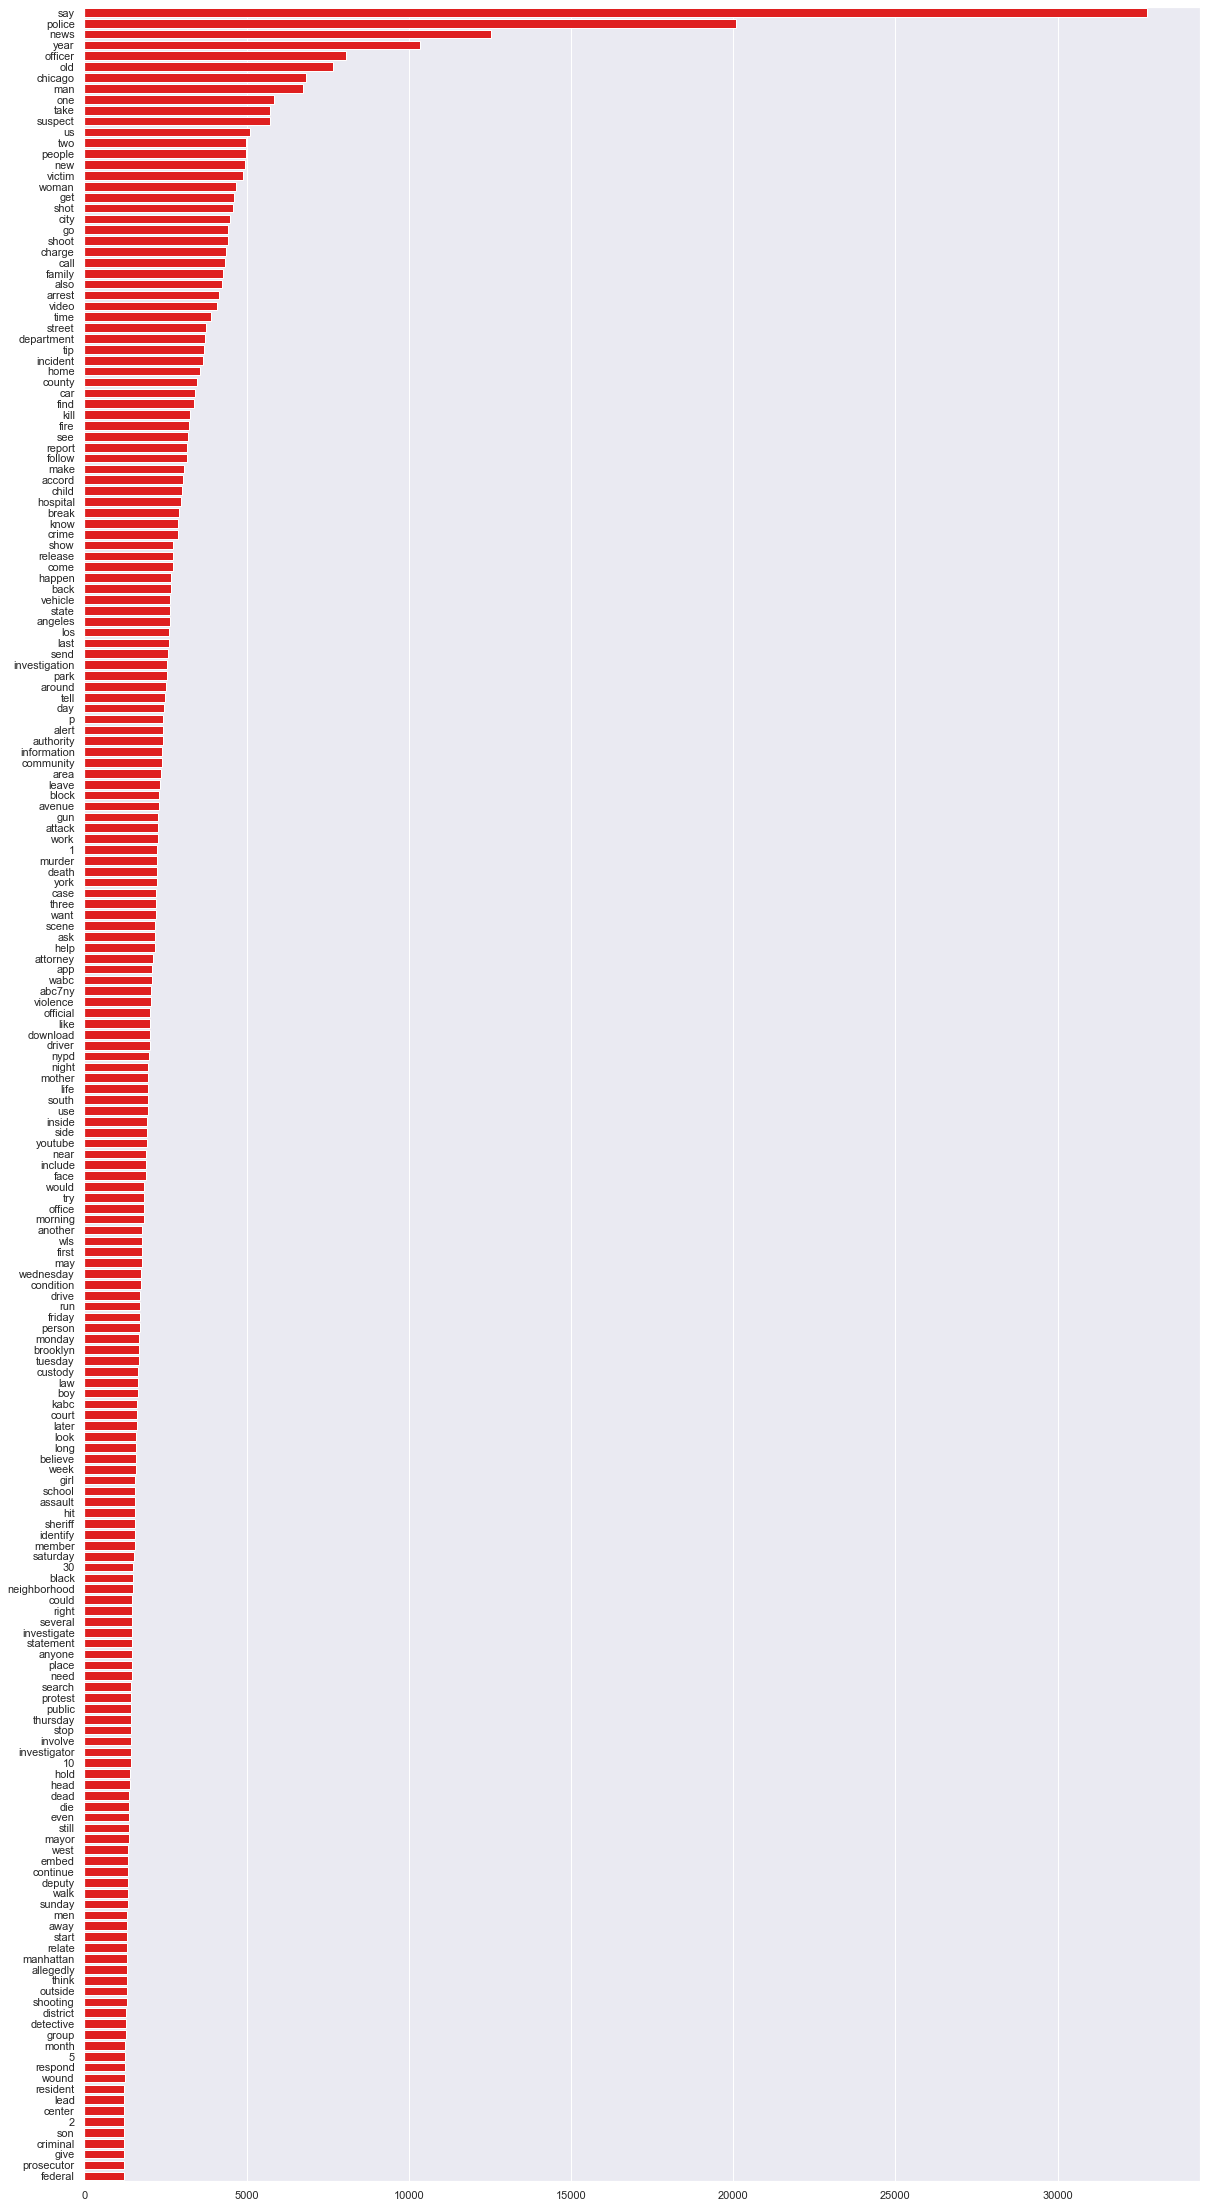

In [11]:
top_200 = frequency_distribution.most_common(200)
fdist = pd.Series(dict(top_200))
sns.set(rc={'figure.figsize':(20, 40)})
sns.barplot(y=fdist.index, x=fdist.values, color='red');

### Frequency Distribution of all adjectives

In [12]:
adjective_tags = ['JJ', 'JJR', 'JJS']

def get_adjectives(text):
    adjectives = []
    text = word_tokenize(text)
    tags = nltk.tag.pos_tag(text)
    for element in tags:
        if element[1] in adjective_tags:
            adjectives.append(element[0])
    return adjectives

adjectives = get_adjectives(all_words)

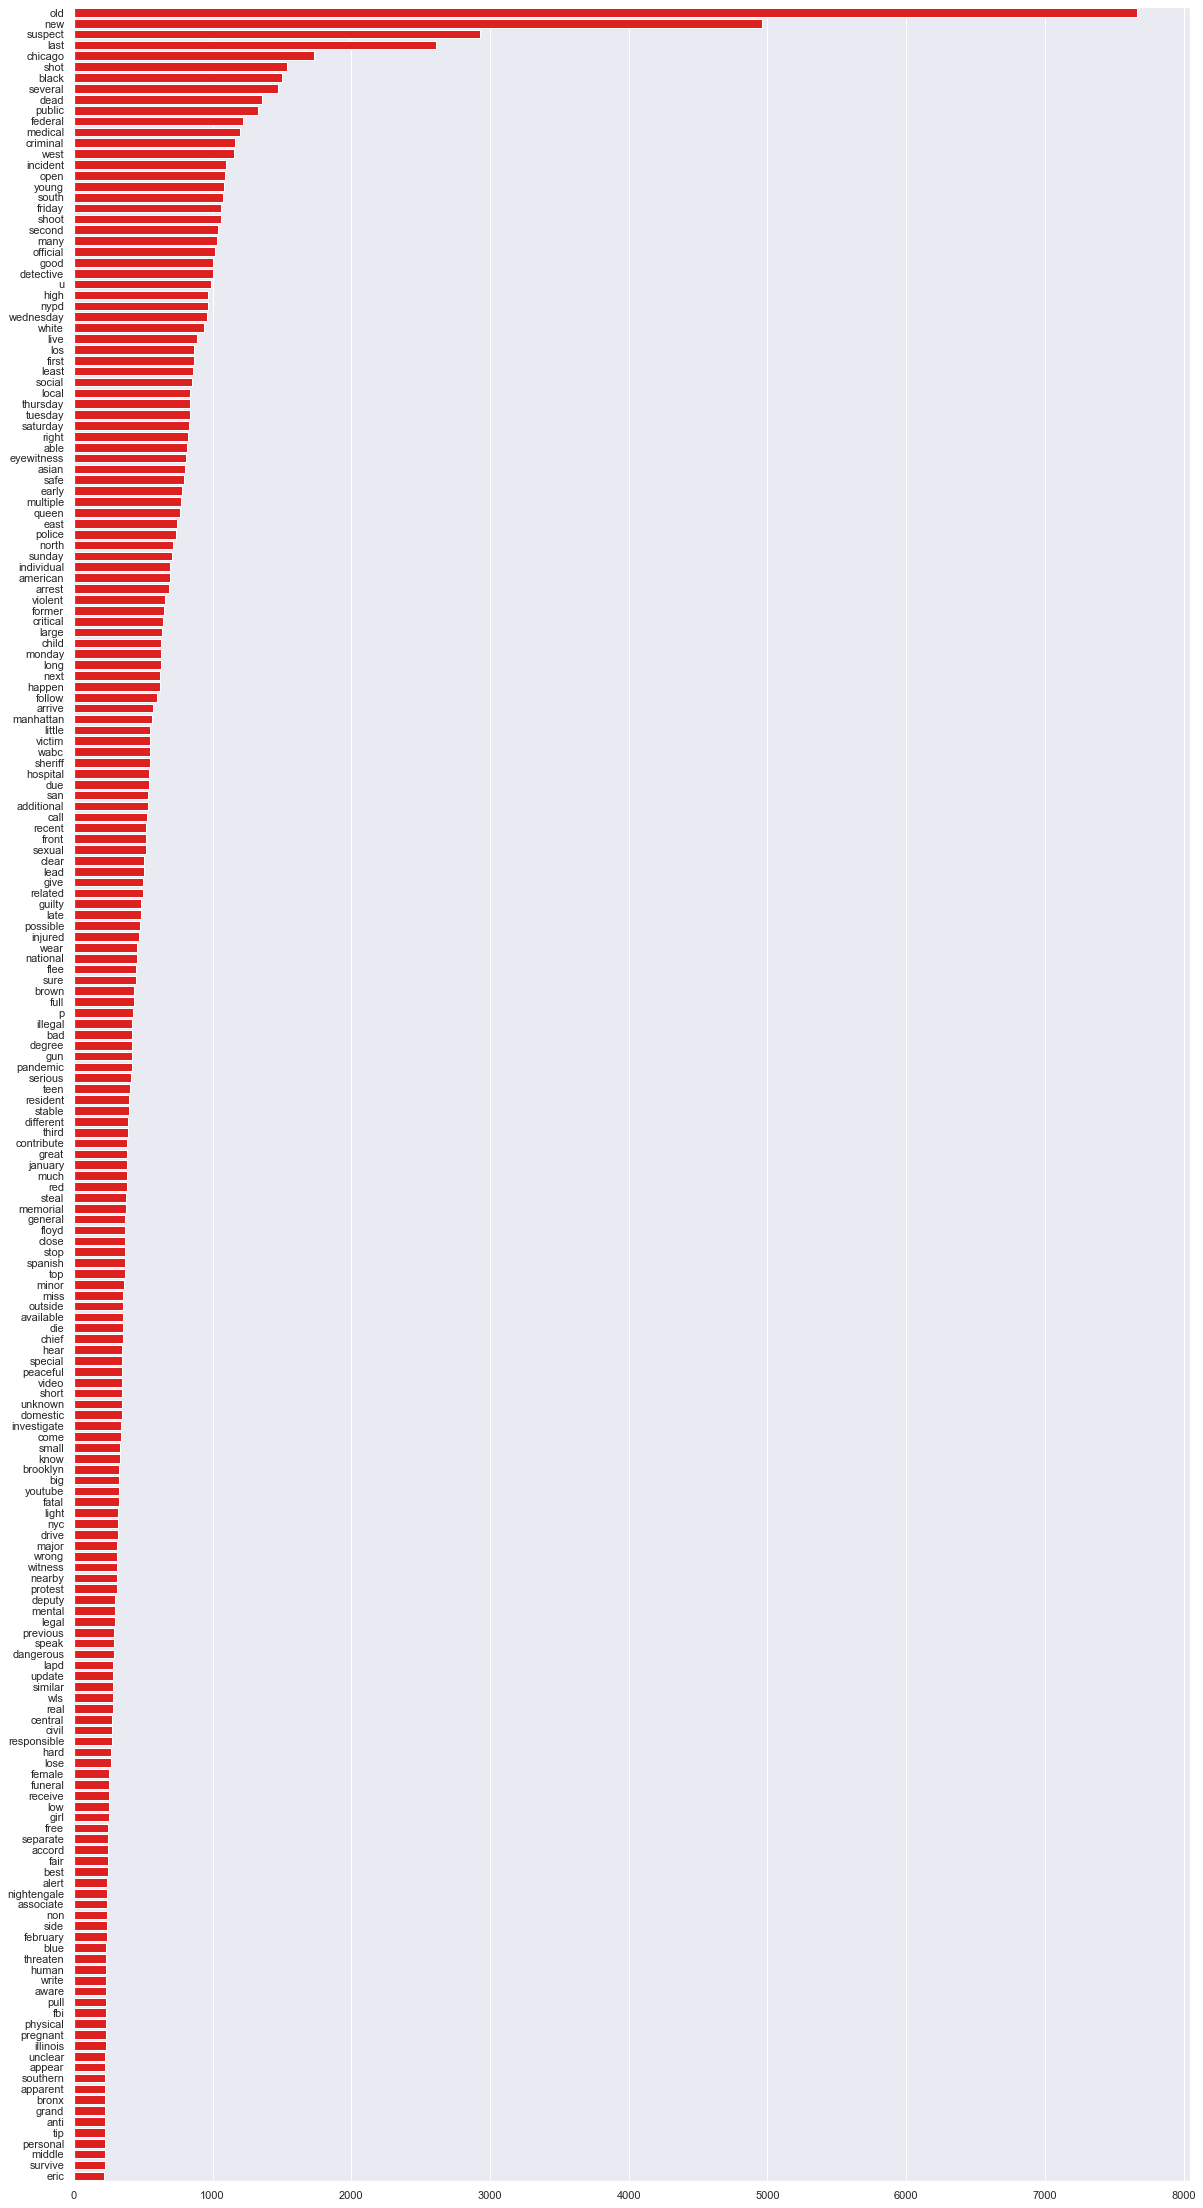

In [13]:
frequency_distribution = FreqDist(adjectives)
top_200 = frequency_distribution.most_common(200)
fdist = pd.Series(dict(top_200))
sns.set(rc={'figure.figsize':(20, 40)})
sns.barplot(y=fdist.index, x=fdist.values, color='red');

### Frequency Distribution of all verbs

In [14]:
verb_tags = ['VB', 'VBD', 'VBG', 'VBN', 'VBZ', 'VBP']

def get_verbs(text):
    verbs = []
    text = word_tokenize(text)
    tags = nltk.tag.pos_tag(text)
    for element in tags:
        if element[1] in verb_tags:
            verbs.append(element[0])
    return verbs

verbs = get_verbs(all_words)

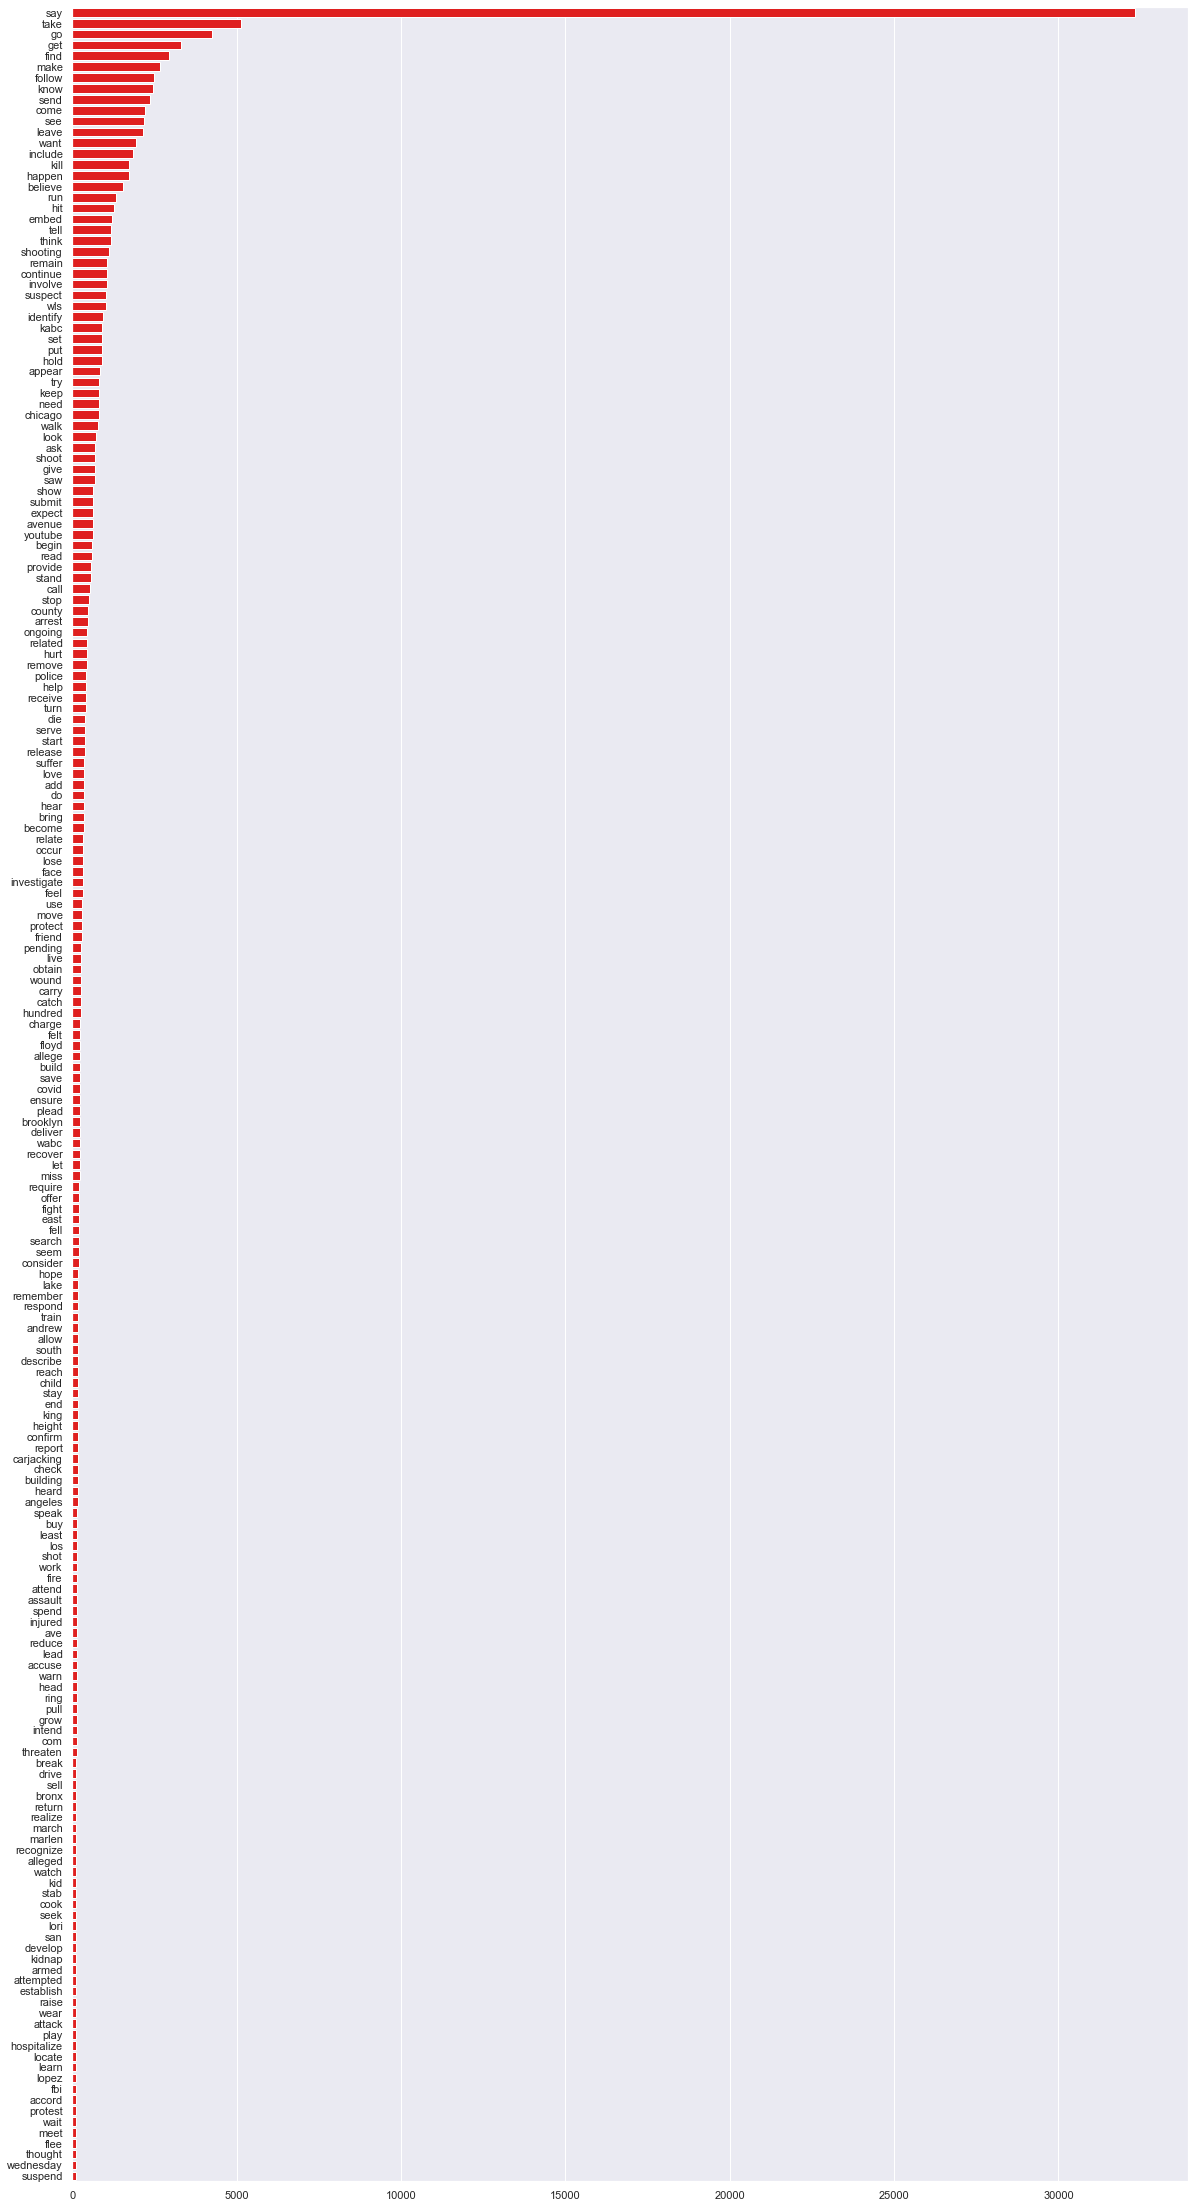

In [15]:
frequency_distribution = FreqDist(verbs)
top_200 = frequency_distribution.most_common(200)
fdist = pd.Series(dict(top_200))
sns.set(rc={'figure.figsize':(20, 40)})
sns.barplot(y=fdist.index, x=fdist.values, color='red');

### Word Cloud of all words

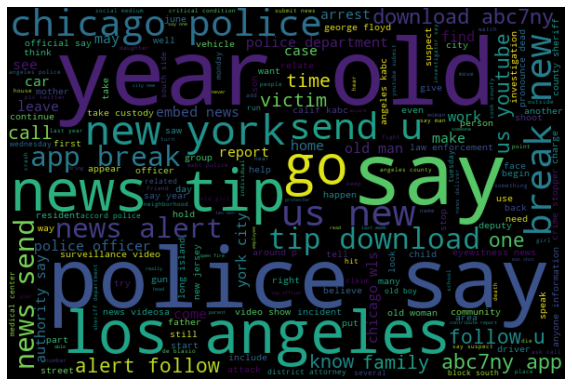

In [16]:
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

### Word Cloud of all adjectives

(-0.5, 599.5, 399.5, -0.5)

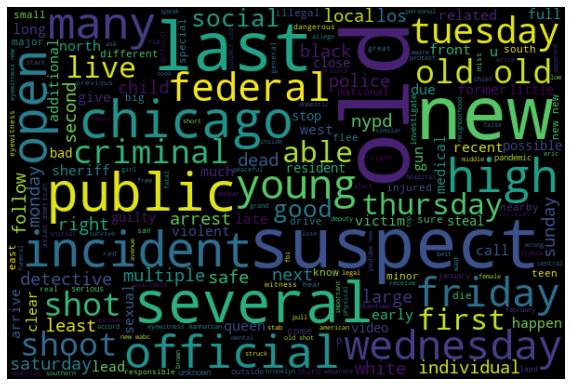

In [20]:
all_adjectives = " ".join(adjectives)
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_adjectives)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

### Word Cloud of all verbs

(-0.5, 599.5, 399.5, -0.5)

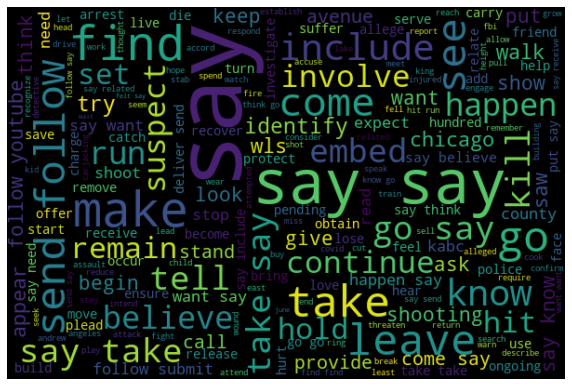

In [21]:
all_verbs = " ".join(verbs)
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_verbs)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

### Distribution of languages

In [17]:
from langdetect import detect

def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

df['language'] = df['Text'].apply(detect_language)

In [18]:
df.groupby(['language']).size()

language
en    6371
es       1
ro       2
dtype: int64

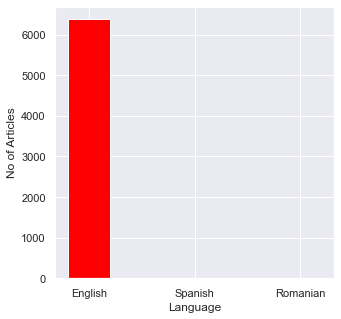

In [27]:
plt.bar(['English', 'Spanish', 'Romanian'],df.groupby('language').size().to_list(), color ='red', width = 0.4)
plt.xlabel("Language")
plt.ylabel("No of Articles")
plt.show()